In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel("Loan_Dataset.xlsx")

In [3]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [4]:
df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [5]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [6]:
df2 = df.copy()

In [7]:
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


Text(0.5, 1.0, 'Application-Income')

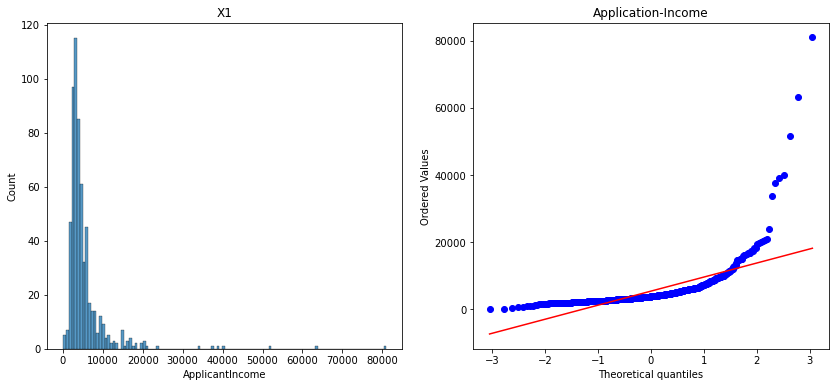

In [8]:
## Histogram
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(df['ApplicantIncome'])
plt.title('X1')

## QQ Plot
plt.subplot(122)
stats.probplot(df['ApplicantIncome'], dist = 'norm', plot = plt)
plt.title("Application-Income")

Text(0.5, 1.0, 'CoapplicantIncome-Income')

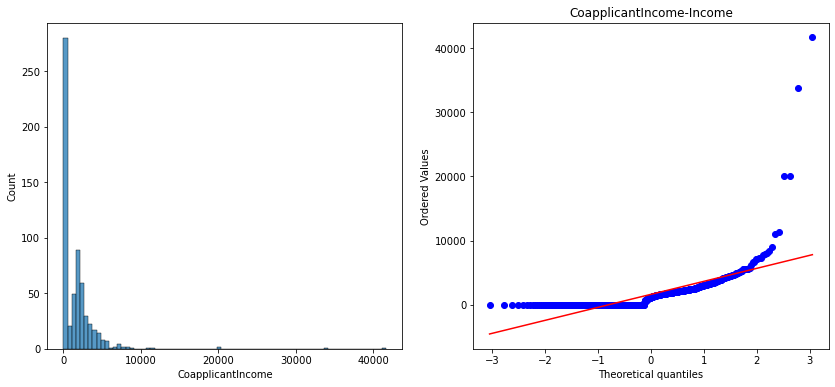

In [9]:
## Histogram
plt.figure(figsize = (14,6))
plt.subplot(121)
sns.histplot(df['CoapplicantIncome'])


## QQ Plot
plt.subplot(122)
stats.probplot(df['CoapplicantIncome'], dist = 'norm', plot = plt)
plt.title("CoapplicantIncome-Income")

In [10]:
df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [11]:
# Using Function Transformer
tf = FunctionTransformer(func = np.log)
# tff = FunctionTransformer(func = np.log1)


## Using Power Transformer
pt = PowerTransformer(method = 'yeo-johnson')


# pt = PowerTransformer(method = 'box-cox')
# The Box-Cox transformation can only be applied to strictly positive data

In [12]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,146.412162
1,4583,1508.0,128.000000
2,3000,0.0,66.000000
3,2583,2358.0,120.000000
4,6000,0.0,141.000000
...,...,...,...
609,2900,0.0,71.000000
610,4106,0.0,40.000000
611,8072,240.0,253.000000
612,7583,0.0,187.000000


In [13]:
dff = tf.fit_transform(df['ApplicantIncome'])
df['ApplicantIncome'] = pd.DataFrame(dff)

##dff = tf.fit_transform(df['CoapplicantIncome'])
# df['CoapplicantIncome'] = pd.DataFrame(dff)

dff = pt.fit_transform(df[['CoapplicantIncome']])
df['CoapplicantIncome'] = pd.DataFrame(dff)

Text(0.5, 1.0, 'after')

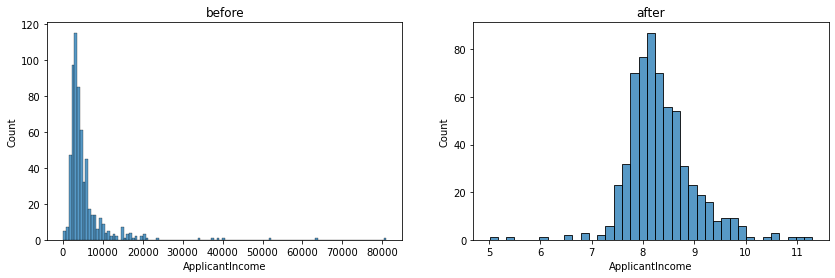

In [14]:
## Histogram
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df2['ApplicantIncome'])
plt.title('before')

plt.subplot(122)
sns.histplot(df['ApplicantIncome'])
plt.title('after')

Text(0.5, 1.0, 'after')

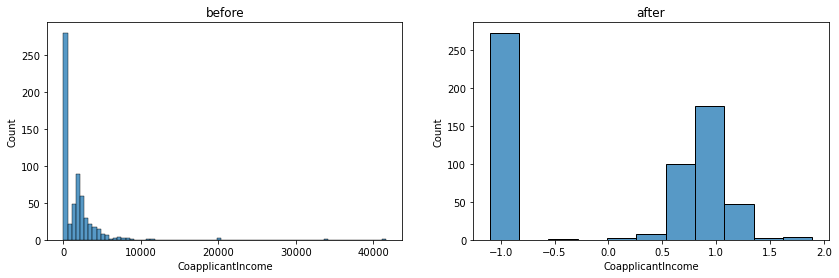

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(df2['CoapplicantIncome'])
plt.title('before')

plt.subplot(122)
sns.histplot(df['CoapplicantIncome'])
plt.title('after')

In [16]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

In [17]:
## y = pd.Series(df['LoanAmount'])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [20]:
## y_test = y_test.values
# y_test = y_test.reshape(-1, 1)


In [21]:
## Residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Accuracy: ", r2_score(y_test, y_pred))
residual = y_test - y_pred

Accuracy:  0.35952100634609274


In [22]:
y_test

533    196.0
544    102.0
41      47.0
148    225.0
111    139.0
       ...  
180    180.0
491    186.0
42      75.0
530    216.0
457    173.0
Name: LoanAmount, Length: 185, dtype: float64